<a href="https://colab.research.google.com/github/pratap977/CS6910/blob/main/Assignment-2/Part-A/Part-A-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 181 kB 38.4 MB/s 
     |████████████████████████████████| 144 kB 60.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=b1a9e6773a8e0e76b55bbc16c2d34048fd6e2fcd32a6067fc942fc59e6e77683
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import math as mh
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dense,Flatten
from keras.preprocessing.image import load_img as im
from keras.preprocessing.image import save_img as sim
import os
from random import shuffle
import numpy as np
import splitfolders
from PIL import Image
from torchvision import transforms
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers,models
import wandb
import pathlib
# import torch

In [ ]:
#gettig labels for different classes and assigning values
class_labels = os.listdir("/content/drive/MyDrive/outputfin/train")
lab={l:i for l,i in zip(class_labels,range(10))}




##############################################################
#function for prepating data takes two parameters
#1.drive_path - path to drive i.e training or validataion or test
#2.want_aug - Takes 'YES' or 'NO' values to gather info wheter to augment data or not
def prepare_data(drive_path,want_aug):
  imgs_tr = []
  truth_tr = []
  #data augmentation rules here
  data_augmentation  = transforms.Compose([
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ])
  for l in class_labels:
    #### for each folder in the val dir we iterate though all the files 
    if l.startswith("."):
      continue
    imgs_per_class = os.listdir(os.path.join(drive_path, l)) #getting list of file names
    for img in imgs_per_class:
      #iterating to each file in the folder 
      img_path = os.path.join(drive_path, l, img)
      img=Image.open(img_path)
      img = img.resize((224,224))
      if img.mode == 'L':
                  continue
      if(want_aug=='YES'):
        normalized_image = data_augmentation(img)
        imgs_tr.append(np.asarray(normalized_image).transpose(1,2,0))
      else:
        normalized_image = img
        imgs_tr.append(np.asarray(normalized_image))
      truth_tr.append(lab[l])
      
  #contain augmented images(imgs_tr) and labels(truth_tr)
  return np.asarray(imgs_tr) , np.asarray(truth_tr) 



#####################################################################
# Preparing training set (with augmentation), validation set and test test
####################################################################
# Preparing training data with augmentation
# Loading data from directory


############augmented Training data############ 
x_train,y_train=prepare_data("/content/drive/MyDrive/outputfin/train",'YES')


#############augmented validation data############ 
x_val,y_val=prepare_data("/content/drive/MyDrive/outputfin/val",'YES')

#############augmented test data############
x_test,y_test=prepare_data("/content/drive/MyDrive/inaturalist_12K/val",'YES')




#####################################################################
# Preparing training set (without augmentation), validation set and test test
####################################################################
# Preparing training data withou augmentation
# Loading data from directory
#############augmented Training data############ 
x_train_un,y_train_un=prepare_data("/content/drive/MyDrive/outputfin/train",'NO')


#############augmented validation data############ 
x_val_un,y_val_un=prepare_data("/content/drive/MyDrive/outputfin/val",'NO')

#############augmented test data############
x_test_un,y_test_un=prepare_data("/content/drive/MyDrive/inaturalist_12K/val",'NO')




In [ ]:
#this function creates a sequential  model and returns the model
#The following are the parameters taken
#1.fil=filter sizes for each layer(all the 5 convolution layers)
#2.ker=kernel dimensions for each layer
#3.activ=activation function for the dense layer 
#4.batchnormalization=takes 'YES' or 'NO' which tells weather to normalize the data or not
#5.dropout=the percentage of dropout scaled from 0 to 1
#6.neurons=number of neurons for the dense layer
def create_CNN(fil,ker,activ,batchnormalisation,dropout,neurons):
  cnn=models.Sequential()
  cnn.add(layers.Conv2D(filters=fil[0], kernel_size=(ker[0], ker[0]), activation='relu',input_shape=(224, 224, 3)))
  cnn.add(layers.MaxPooling2D((2, 2)))
  if(batchnormalisation=='YES'):
    cnn.add(layers.BatchNormalization())
        
        
  cnn.add(layers.Conv2D(filters=fil[1], kernel_size=(ker[1], ker[1]), activation='relu'))
  cnn.add(layers.MaxPooling2D((2, 2)))
  if(batchnormalisation=='YES'):
    cnn.add(layers.BatchNormalization())
                                                  
  cnn.add(layers.Conv2D(filters=fil[2], kernel_size=(ker[2], ker[2]), activation='relu'))
  cnn.add(layers.MaxPooling2D((2, 2)))
  if(batchnormalisation=='YES'):
    cnn.add(layers.BatchNormalization())
         
  cnn.add(layers.Conv2D(filters=fil[3], kernel_size=(ker[3], ker[3]), activation='relu'))
  cnn.add(layers.MaxPooling2D((2, 2)))
  if(batchnormalisation=='YES'):
    cnn.add(layers.BatchNormalization())

  cnn.add(layers.Conv2D(filters=fil[4], kernel_size=(ker[4], ker[4]), activation='relu'))
  cnn.add(layers.MaxPooling2D((2, 2)))
  
  if(batchnormalisation=='YES'):
    cnn.add(layers.BatchNormalization())


  cnn.add(layers.Flatten())
  if(dropout!=0):
    cnn.add(layers.Dropout(dropout))
  cnn.add(layers.Dense(neurons, activation=activ))
  
  cnn.add(layers.Dense(10, activation='softmax'))
  return cnn

In [ ]:
#best model 1
cnn1=create_CNN([64,128,256,512,1024],[3,3,3,3,3],'sigmoid','NO',0.5,32)
cnn1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# cnn.fit(train_data, batch_size=128,epochs=10,validation_data=val_data)
cnn1.fit(x_train,y_train, batch_size=16,epochs=35,validation_data=(x_val,y_val))
tloss,tacc=cnn1.evaluate(x_test,y_test)
  # wandb.log({"Test loss":tloss,"Test Accuracy":tacc})
print("Test loss:",tloss,"Test Accuracy:",tacc)

Epoch 1/35
563/563 [==============================] - 34s 44ms/step - loss: 2.1841 - accuracy: 0.1933 - val_loss: 2.1152 - val_accuracy: 0.2272
Epoch 2/35
563/563 [==============================] - 23s 42ms/step - loss: 2.0692 - accuracy: 0.2690 - val_loss: 2.0771 - val_accuracy: 0.2633
Epoch 3/35
563/563 [==============================] - 23s 42ms/step - loss: 2.0052 - accuracy: 0.2981 - val_loss: 1.9911 - val_accuracy: 0.2953
Epoch 4/35
563/563 [==============================] - 23s 42ms/step - loss: 1.9599 - accuracy: 0.3200 - val_loss: 1.9545 - val_accuracy: 0.3143
Epoch 5/35
563/563 [==============================] - 23s 42ms/step - loss: 1.9125 - accuracy: 0.3314 - val_loss: 1.9340 - val_accuracy: 0.3053
Epoch 6/35
563/563 [==============================] - 23s 41ms/step - loss: 1.8668 - accuracy: 0.3567 - val_loss: 1.8897 - val_accuracy: 0.3333
Epoch 7/35
563/563 [==============================] - 23s 41ms/step - loss: 1.8250 - accuracy: 0.3779 - val_loss: 1.8735 - val_accuracy:

In [ ]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
# Saving the model
cnn1.save(pathlib.Path('/content/drive/MyDrive/DL_Assignment2_PartA_Model1'))

NameError: ignored

**Part-A-4(a).**
**We got 43% as Test_Acuuracy**

In [ ]:
# Loading the saved model (Also required for Q4 (b), Q4 (c) and Q5)
cnn1 = tf.keras.models.load_model(pathlib.Path('/content/drive/MyDrive/DL_Assignment2_PartA_Model1'))
tloss,tacc=cnn1.evaluate(x_test,y_test)
# wandb.log({"Test loss":tloss,"Test Accuracy":tacc})
print("Test loss:",tloss,"Test Accuracy:",tacc)

63/63 [==============================] - 106s 2s/step - loss: 1.8954 - accuracy: 0.4305
Test loss: 1.8954235315322876 Test Accuracy: 0.43050000071525574


In [ ]:
import torch

#denormalizaImg function de augument the image provided as parameter to it and returns the de deaugmented pic 
def denormalizeImg(pic):
  mu, sd = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
  good = pic.cpu() * torch.tensor(sd).view(3, 1, 1).cpu() + torch.tensor(mu).view(3, 1, 1)
  img = transforms.ToPILImage(mode='RGB')(good)
  return img

#This function is used to accumulate 30 test pics from x_test where for each Image we gather 2 images i.e augmented and deaugmented Image
#Function returns a list of lists where each inner list contains augmented and deaugmented Image for a particular image
def getImages():
  data=[]
  for i in lab:
    k=0
    for j in range(len(x_test)):
      if(k==3):
        break
      if(y_test[j]==lab[i]):
        # de=denormalizeImg(x_test)
        data.append([x_test[j:j+1],x_test_un[j],lab[i]])
        k+=1
  return data



In [ ]:
wandb.login(relogin=True)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="A2-PartA-4B")

wandb: Currently logged in as: pratap49 (use `wandb login --relogin` to force relogin)


**Part-A-4(b)**

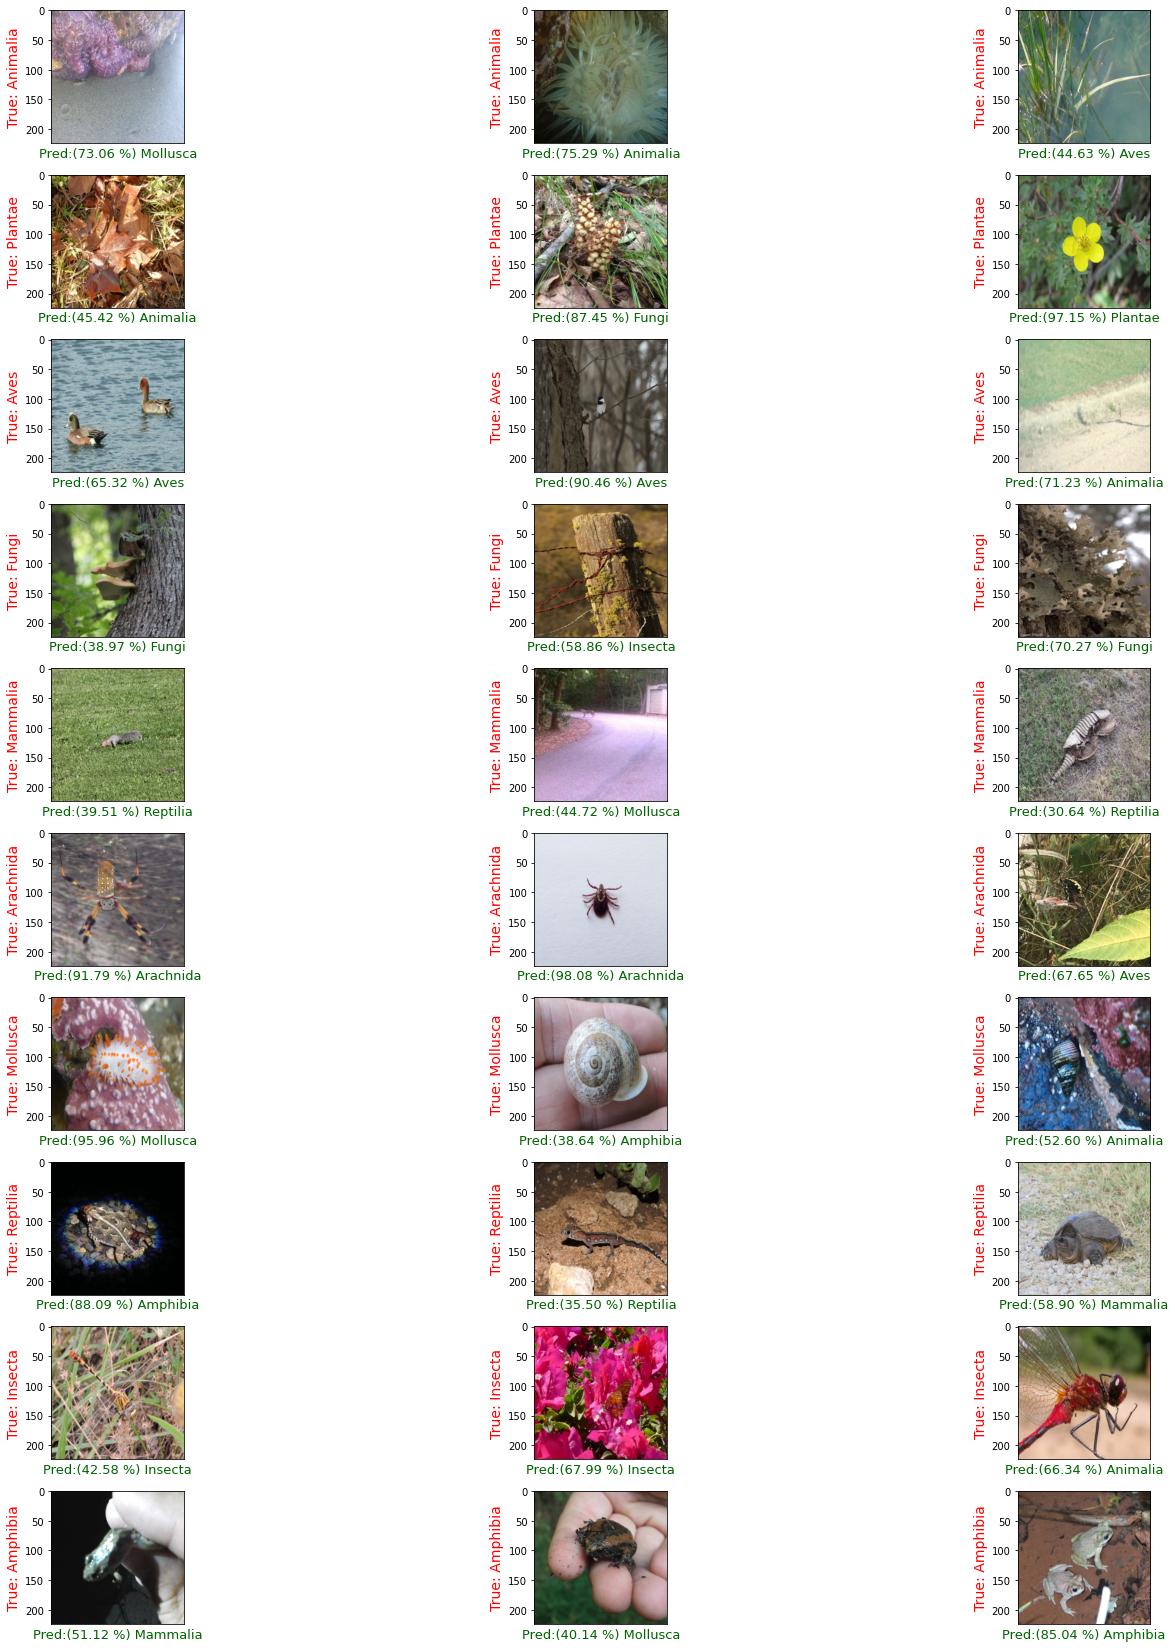

In [ ]:
sample=getImages()
myfig=plt.figure(figsize=(23,23))
for x in range(30):
    myfig.add_subplot(10, 3, x+1)
    plt.imshow(sample[x][1])
    plt.ylabel("True: "+ class_labels[sample[x][2]], fontsize=14).set_color('red')
    predicted_lab = class_labels[np.argmax(cnn1.predict(sample[x][0]))]
    predicted_prob=np.max(cnn1.predict(sample[x][0]))/np.sum(cnn1.predict(sample[x][0]))
    plt.xlabel("Pred:("+ str(format(predicted_prob*100, '.2f'))+ " %) " + str(predicted_lab), fontsize=13).set_color('darkgreen')
    plt.xticks([])
    # plt.yticks([])
    plt.grid(False)
myfig.tight_layout()
myfig.savefig("Part-A_Ques-4(b).png")

wandb.log({'Test images Prediction ': [wandb.Image(myfig)]})

In [ ]:
layer_dict = {layer.name:layer for layer in cnn1.layers}
print(layer_dict)

{'conv2d': <keras.layers.convolutional.Conv2D object at 0x7f28614da090>, 'max_pooling2d': <keras.layers.pooling.MaxPooling2D object at 0x7f2850644190>, 'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f2850644b50>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f28506470d0>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f2850647b50>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f285064b0d0>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f285064bb10>, 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D object at 0x7f285064ffd0>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f2850651a90>, 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D object at 0x7f2850655050>, 'flatten': <keras.layers.core.flatten.Flatten object at 0x7f2850655c50>, 'dropout': <keras.layers.core.dropout.Dropout object at 0x7f2850659350>, 'dense': <keras.layers.core.dense.Dense object at 0x7f2850659dd0>, 'dense_1': <ker

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="A2-PartA-4C")

**Part-A-4(c)**

23
(1, 224, 224, 3)
(1, 222, 222, 64)


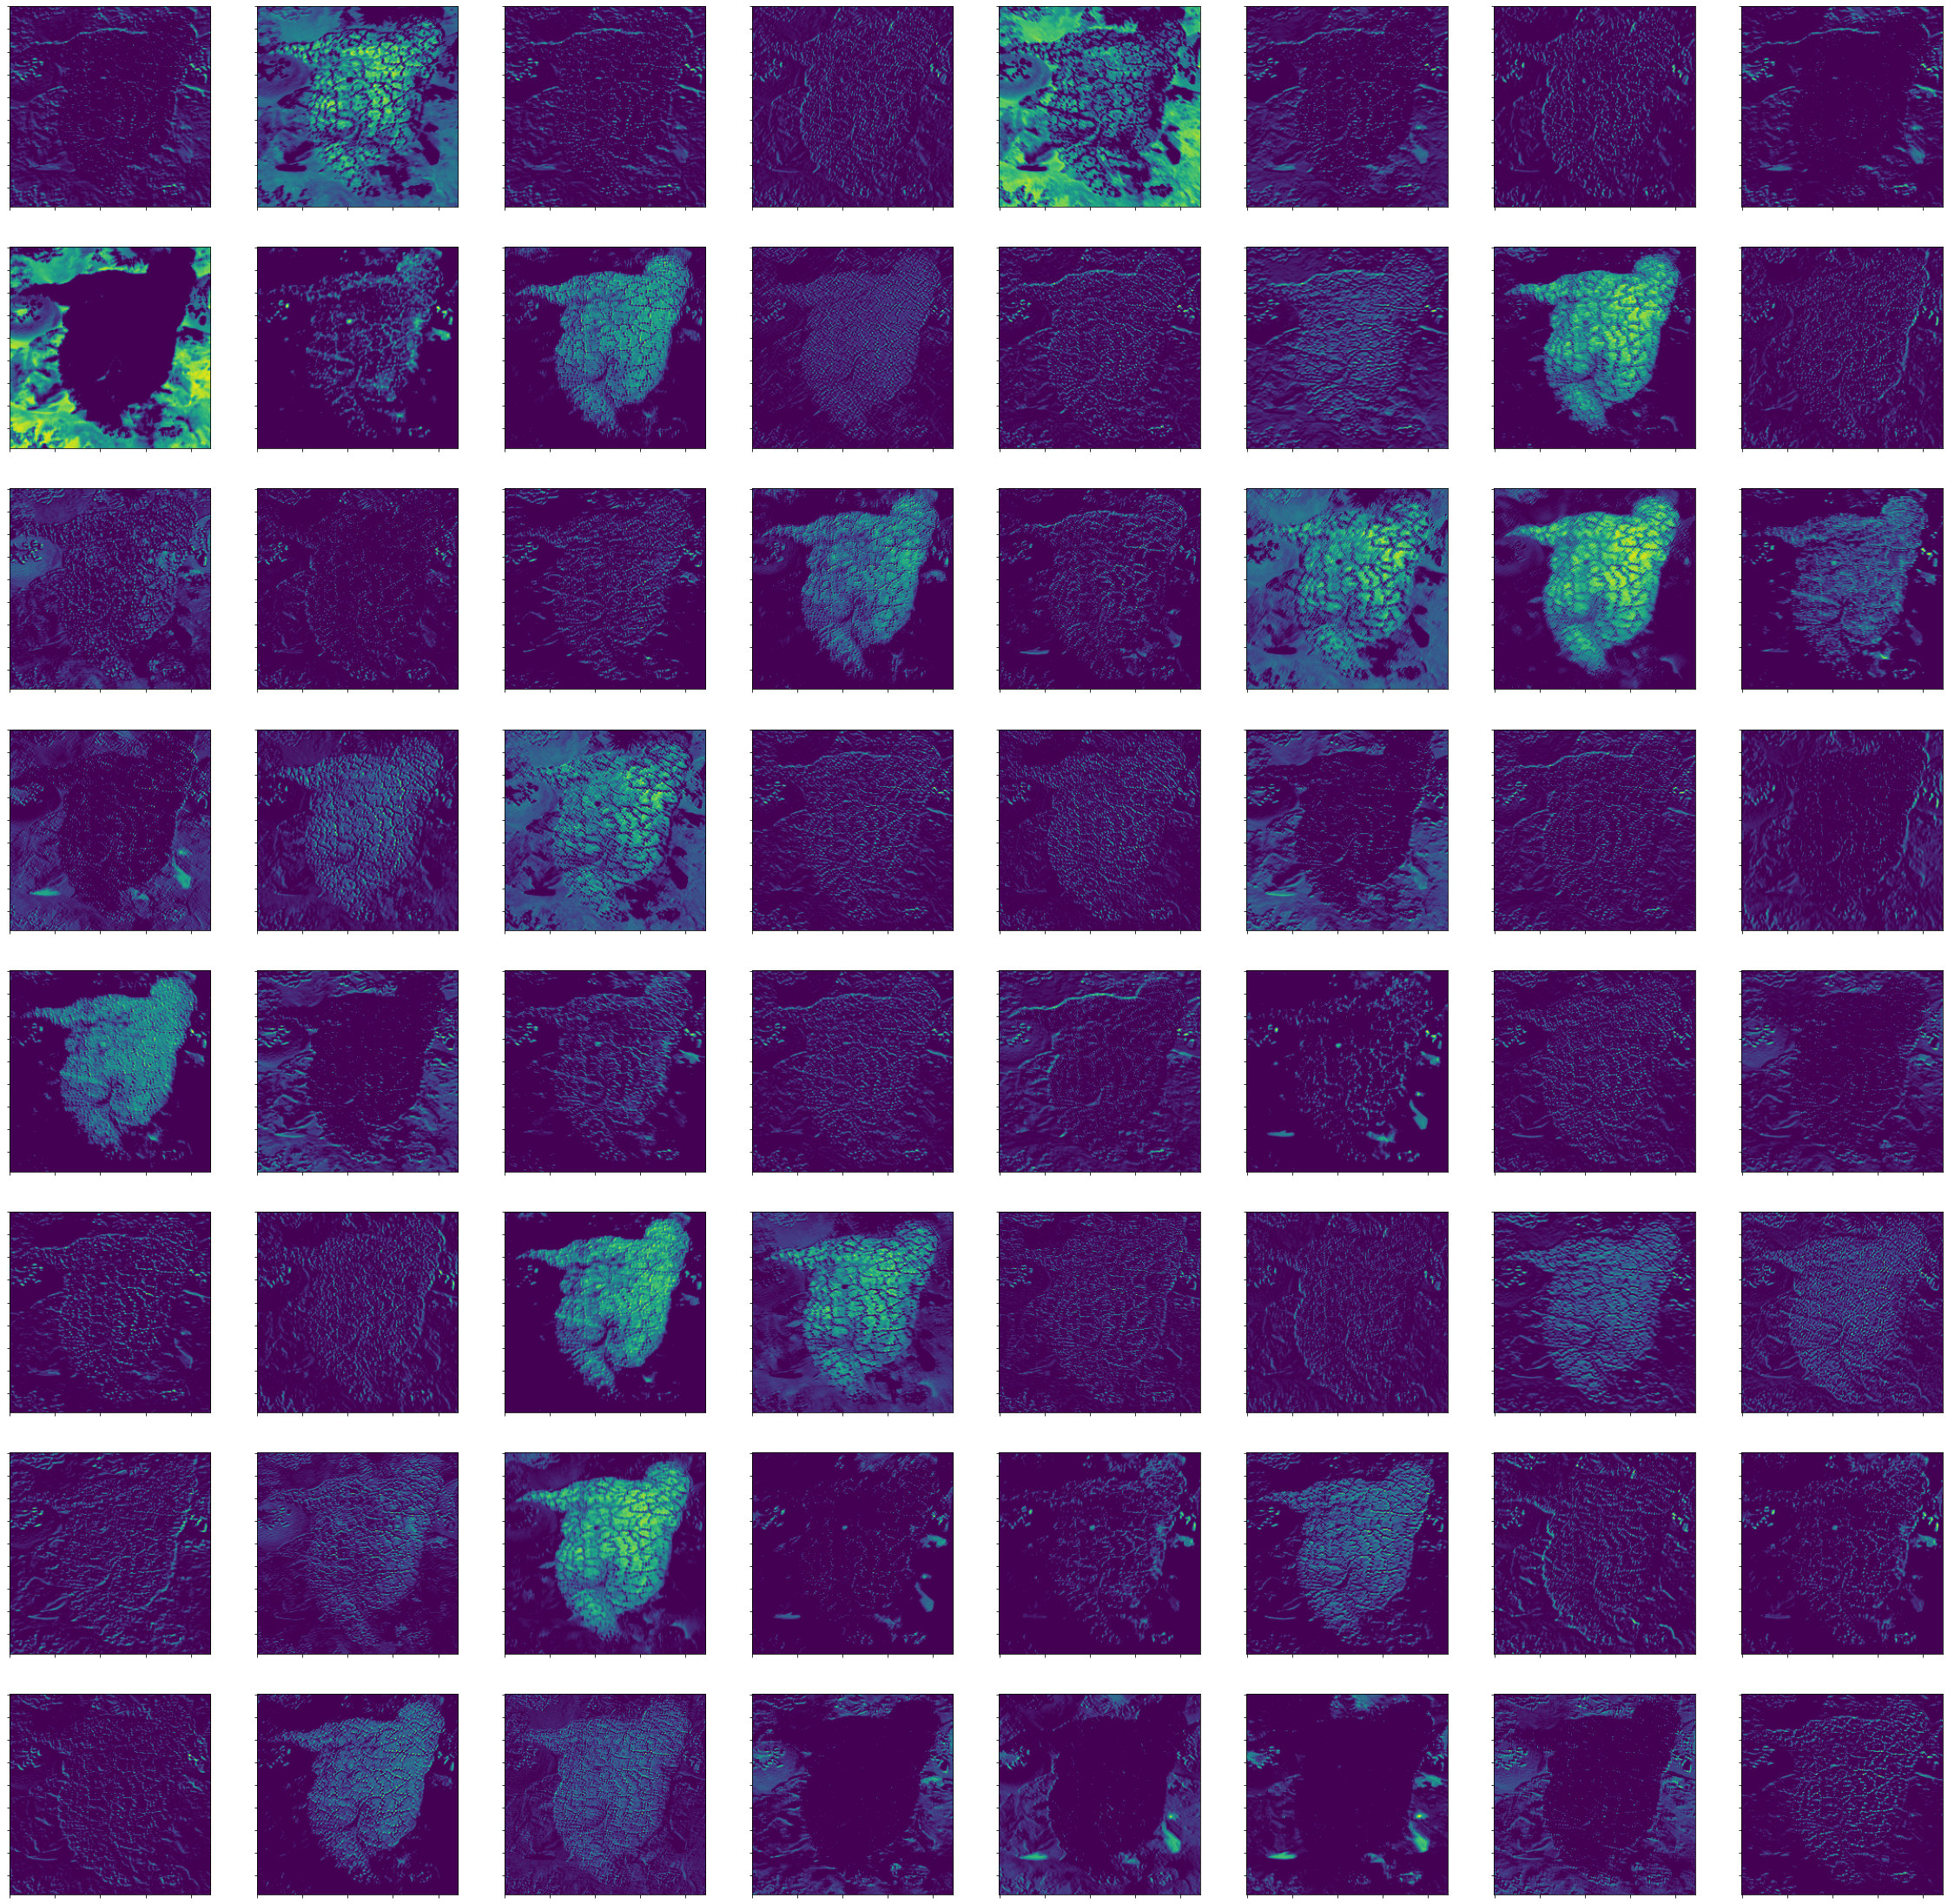

In [ ]:
model_first_conv = tf.keras.models.Model(inputs = cnn1.inputs, outputs = cnn1.layers[0].output) #Creating new model that output first convolution layer
img_random = 23 #np.random.randint(62) # Random image from test dataset

img_visualize = x_test[img_random:img_random+1]


filter_visualize =model_first_conv.predict(img_visualize)
print(filter_visualize.shape)
fig, axs = plt.subplots(8, 8, figsize = (40, 40))
for filter_num in range(64):
    axs[int(filter_num/8), filter_num%8].imshow(filter_visualize[0,:,:,filter_num])
    axs[int(filter_num/8), filter_num%8].set_yticklabels([])
    axs[int(filter_num/8), filter_num%8].set_xticklabels([])

wandb.log({'Original Image': [wandb.Image(img_visualize)]})
wandb.log({'Visualized filters for first convolution layer': [wandb.Image(fig)]})